Problema de Laplace:
\begin{align*}
    \begin{cases}
        \nabla^{2}\,u(x, y) = 0, \text{ para } (x, y) \in \Omega \\
        u(x, y) = 0, \text{ para } (x, y) \in \partial\,\Omega_{A, B, C} \\
        u(x, y) = \sin(2\,\pi\,x), \text{ para } (x, y) \in \partial\,\Omega_{D}.
    \end{cases}
\end{align*}

[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]


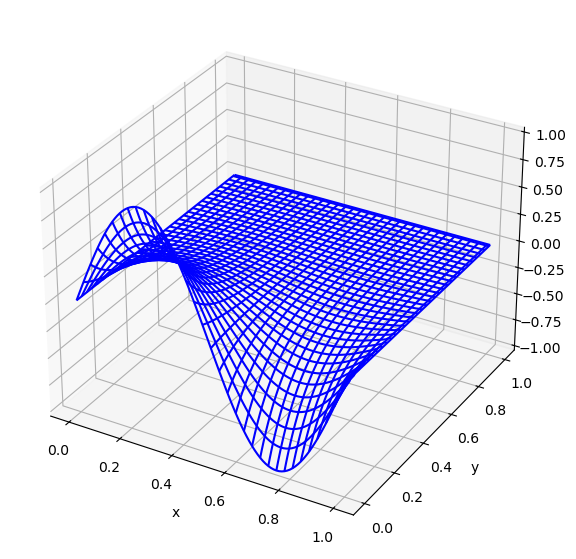

In [16]:
import numpy as np
import matplotlib.pyplot as plt


h = 0.01
x = np.arange(0, 1+h, h)
y = np.arange(0, 1+h, h)

u_a = 0  # Dirichlet em omega_a
u_b = 0  # Dirichlet em omega_b
u_c = 0  # Dirichlet em omega_c
u_d = np.sin(2*np.pi*x)

tam = len(x)-2  # Número de incógnitas

# Monta a matriz T de cada coluna do domínio
T = np.zeros((tam, tam))
T[0, 0] = -2
T[0, 1] = 1

for i in range(1, tam-1):
    T[i, i-1], T[i, i], T[i, i+1] = 1, -2, 1

T[tam-1, tam-1] = -2
T[tam-1, tam-2] = 1

I = np.identity(tam)

# print(f"{T}\n{I}")

# Monta a mstriz A do sistema AU = F
A = np.kron(T, I) + np.kron(I, T)
print(A)

# Cria o vetor F do sistema AU=F
f = np.zeros(tam*tam)

# Incluindo condições de contorno no lado direito da equação, isto é vetor F
for i in range(tam):
    f[i + 0*tam] = u_a # Direita
    f[i + (tam-1)*tam] += u_b  # Esquerda
    f[(tam-1) + i*(tam)] += u_c  # Em cima
    f[0 + i*(tam)] += u_d[i+1] # Embaixo

f /= -h**2

solucao = np.linalg.solve(A, f*h**2)

# Inclui os pontos do contorno no vetor solução, agora em formato 2D para plotar o resultado
u = np.zeros((tam+2, tam+2))

for i in range(tam+2):
    u[i, 0] = u_a
    u[i, tam+1] = u_b
    u[tam+1, i] = u_c
    u[0, i] = u_d[i]

# Copia a solução dos pontos internos para a matriz com o resultado a ser plotado
for i in range(1, tam):
    for j in range(1, tam):
        k = i-1
        l = j-1
        u[i, j] = solucao[k + tam*l]

x, y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(x, y, u, color='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()